# Churn Modeling & Evaluation <br><small>with Accuracy, Precision, Recall, and Confusion Matrices</small>
**by Remington Greider-Little**<br/>
**Data Analytics @ Newman University**

**Data:** [Churn-Modelling - Kaggle](https://www.kaggle.com/shubh0799/churn-modelling)

**This Notebook:** This is crafted as a demonstration of model evaluation, with confusion matrices to help evaluate accuracy, precision, and recall.

**Contents:**
1. Read and Review Data
2. Prepare Data Splits
3. Fit Models
4. Test Models
5. Evaluate Models

In [7]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

# Libraries for Machine Learning Process
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
# Customize seaborn plot styles
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)
sns.set_style('ticks')
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

# 1. Read and Review Data

This data has been cleaned in a previous EDA and preparation process.

In [9]:
# Read cleaned version of the data
df = pd.read_csv('data/churn_cleaned.csv')
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
5,645,1,0,44,8,113755.78,2,1,0,149756.71,1
6,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,376,2,1,29,4,115046.74,4,1,0,119346.88,1
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0


In [10]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# 2. Prepare Data Splits

In [11]:
# features — all columns except target variable
features = df.drop('Exited', axis=1)

# labels — only the target variable column
labels = df['Exited']

In [12]:
# Create Train and Test Splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Report Number and Proportion of Train and Test Features and Labels
print(f'Train Split: {X_train.shape[0]} Records, {len(y_train)} Labels = {round(len(y_train)/len(labels), 4) * 100}%')
print(f'Test Split: {X_test.shape[0]} Records, {len(y_test)} Labels = {round(len(y_test)/len(labels), 4) * 100}%')

Train Split: 8000 Records, 8000 Labels = 80.0%
Test Split: 2000 Records, 2000 Labels = 20.0%


# 3. Train Models

In [13]:
# Define a models list
models = [
          LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier()
          ]

# Train the models using the training features and labels
for model in models:
  model.fit(X_train, y_train)
  # Report trained model
  print(f'Trained and ready: {model}')

Trained and ready: LogisticRegression()
Trained and ready: DecisionTreeClassifier()
Trained and ready: RandomForestClassifier()
Trained and ready: GradientBoostingClassifier()


# 4. Test Models

In [14]:
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(model)
    print(f'  {round(accuracy, 3)}')
    print('')

LogisticRegression()
  80.05

DecisionTreeClassifier()
  77.4

RandomForestClassifier()
  86.65

GradientBoostingClassifier()
  86.45



# 5. Evaluate Models
Generate and review a report for each model, including:
- Accuracy Score
- [Precision Score](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Recall Score](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

## Print Accuracy, Precision, and Recall Scores

In [15]:
# Function for generating model scores
def report_scores(model):
    '''
    Generate model scores and confusion matrices with custom colors and descriptive labels
    model = model variable
    '''
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
#     f1 = f1_score(y_test, y_pred) * 100
#     auc = roc_auc_score(y_test, y_pred)

    print(model)
    print(f'  Accuracy: {round(accuracy, 2)}%')
    print(f'  Precision: {round(precision, 2)}%')
    print(f'  Recall: {round(recall, 2)}%')
#     print(f'  F1: {round(f1, 2)}%')
#     print(f'  AUC: {round(auc, 2)}')
    print('')

In [16]:
# Report them all in one shebang
for model in models:
    report_scores(model)

LogisticRegression()
  Accuracy: 80.05%
  Precision: 45.16%
  Recall: 7.12%

DecisionTreeClassifier()
  Accuracy: 77.4%
  Precision: 43.34%
  Recall: 48.85%

RandomForestClassifier()
  Accuracy: 86.65%
  Precision: 75.0%
  Recall: 48.09%

GradientBoostingClassifier()
  Accuracy: 86.45%
  Precision: 74.02%
  Recall: 47.84%



## Enhanced Confusion Matrix with Accuracy, Precision, and Recall Scores
Confusion matrix custom designed with
- Blue = True (True Neg and True Pos)
- Gray = False (False Neg and False Pos
- Count of records in each group
- Percentage of records in each group
- Group labels
- Axis labels

In [17]:
# Function for generating model scores and confusion matrices with custom colors and descriptive labels

def report_scores_enhanced(model):
    '''
    Generate model scores and confusion matrices with custom colors and descriptive labels
    model = model variable
    features = features of desired split
    labels = labels of desired split
    '''
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

    # axis labels for the confusion matrix plot
    cm_y_labels = ['0','1'] # column labels
    cm_x_labels = ['0','1'] # row labels
    
    # Confusion matrix labels
    # Review and update to match the appropriate labels for your data set
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
    group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_counts, group_names, group_percentages)]
    group_labels = np.asarray(group_labels).reshape(2,2)

    # Begin plot setup
    fig, ax = plt.subplots(figsize=(4.2, 4.2))

    # Heatmap
    sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='', 
                cmap=cm_colors, cbar=False,
                yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)
    
    # Axis elements
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=10, length=0)
    ax.set_xlabel('Predicted Values', size=10)
    ax.set_ylabel('Actual Values', size=10)
    
    # Position group labels and set colors
    for text_elt, group_label in zip(ax.texts, group_labels):
        ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
                ha='center', va='top')

    # Title for each plot
    # Adjust pad to provide room for the score report below title and above confusion matrix plot
    plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')
#     plt.title(f'{model}', pad=100, loc='left', fontsize=16, fontweight='bold')

    # Score reports beneath each title
    # Adjust x and y to fit report -- try 0.74 for the y if you activate F1 and AUC
    (
        plt.figtext(0.21, 0.78, 
                    f'Accuracy:  {round(accuracy, 3)}%\n'
                    + f'Precision:  {round(precision, 2)}%\n' 
                    + f'Recall:  {round(recall,2)}%\n'
#                     + f'F1: {round(f1, 2)}%\n'
#                     + f'AUC: {round(auc, 2)}'
                    , 
                    wrap=True, ha='left', fontsize=10)
    )

    # Display the plot!
    plt.tight_layout()
    plt.subplots_adjust(left=0.2)
    print('\n') # Add a blank line for improved spacing
    plt.show()

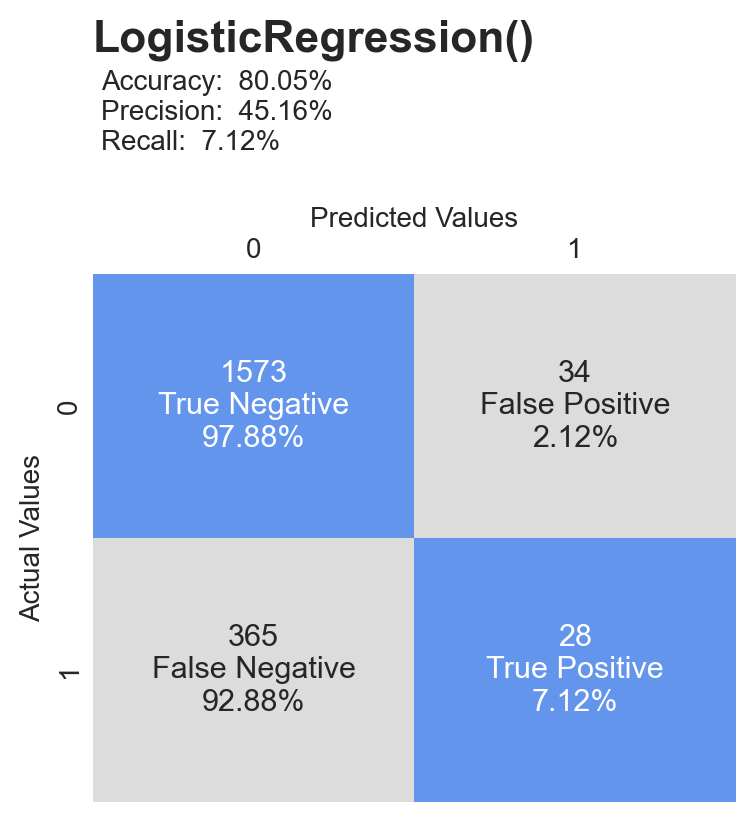

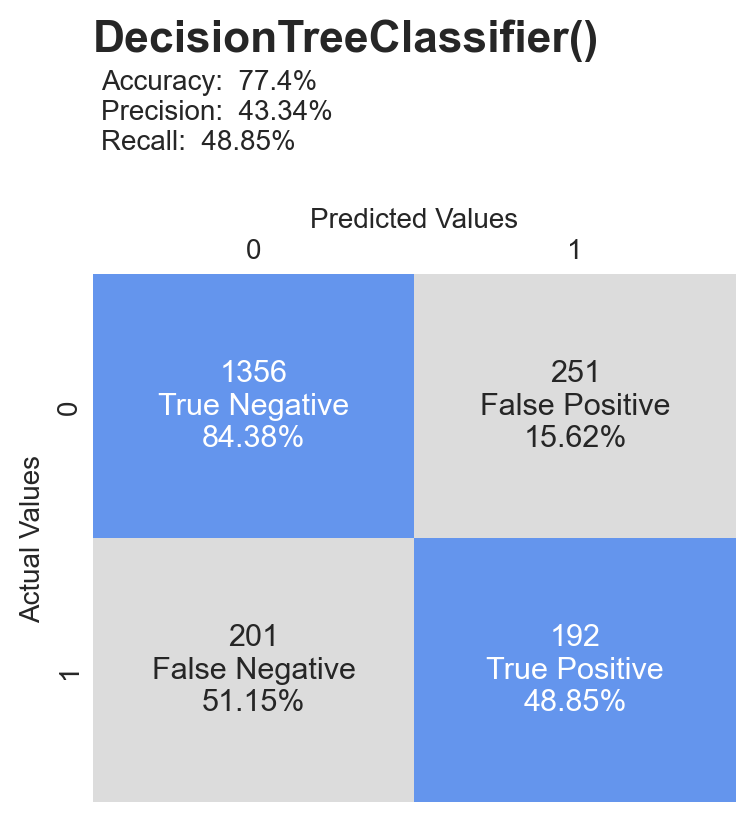

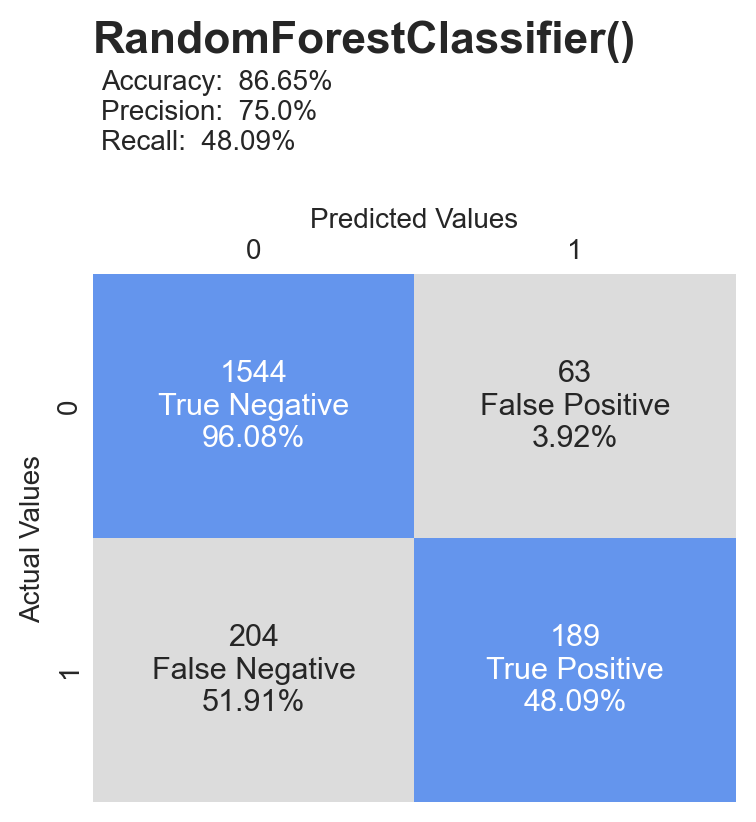

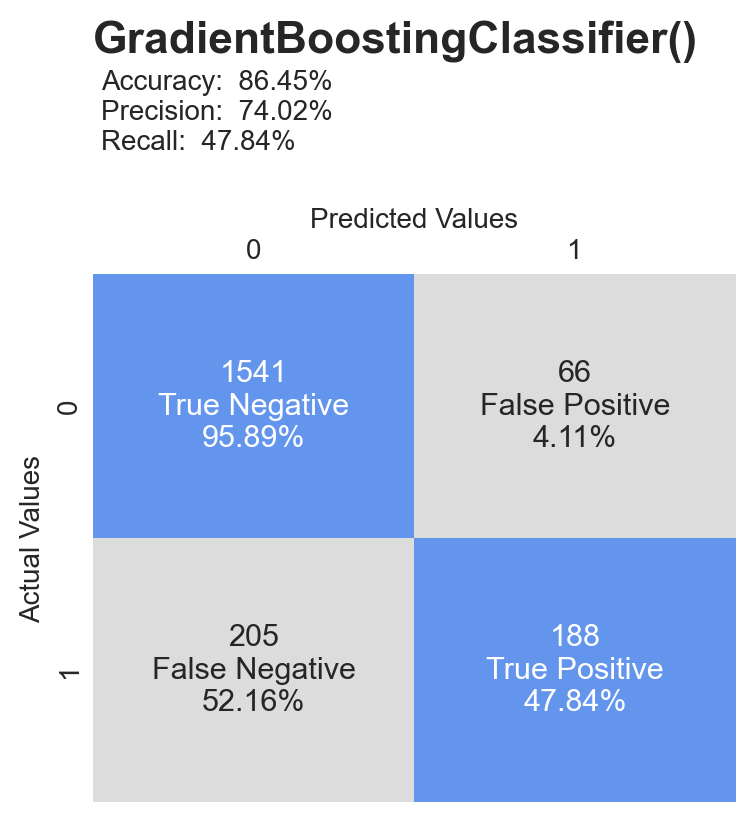

In [19]:
for model in models:
    report_scores_enhanced(model)

## Interpretation of Scores and Confusion Matrices

The business objective for this project is to correctly identify customers who are likely to churn, so that we may reach out to them more effectively in order to better retain them as our clients. Because of this, the best way to evaluate the models is based on how many churners it correctly predicted, this is the recall. After reviewing the models the best model for this purpose is the decision tree. However, the decision tree had the most false positive which shows it might be overly sensitive. The random forest might be a more reliable model because of its high accuracy and precision. Moving forward, it will probably be best to tune and combine the models so that we have not only a high recall, but high precision as well. 

### Linear Regression

The linear regression model had fairly good accuracy at 80.5%, but the lowest recall of the models at 7.12%. Because of this low recall, it does not work well for this business objective. This model had the least false positives but the most false negatives.

### Decision Tree

This model correctly identified the most churners and had the highest recall at 48.85%, but also had the lowest precision and accuracy of all the models. It had the highest number of false positives at 15.62% which might indicate it is overly sensitive. 

### Random Forest

The random forest model had the highest accuracy and precision of all the models and the second highest recall. This model might be the most reliable due to having almost the same recall as the decision tree but far better precision.

### Gradient Boosting

The gradient boosting model is similar to the random forest model in terms of performance and its accuracy, precision, and recall. Its scores are only slightly lower and it predicted only one less true positive.